In [1]:
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup
from sentence_transformers import SentenceTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.neural_network import MLPRegressor
import matplotlib.pyplot as plt

d:\Studia\Semestr 6\Sztuczna Inteligencja\jester_mlp\.venv\Lib\site-packages\sentence_transformers\cross_encoder\CrossEncoder.py:11: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm, trange


In [2]:
rng = np.random.RandomState(2)

In [3]:
Y = pd.concat(pd.read_excel(f"./data/jester-data-{i}.xls", header=None) for i in range(1, 4))
Y = Y.iloc[:, 1:].replace(99, float("NaN"))
Y = Y.mean()

Y.describe()

count    100.000000
mean       0.702018
std        1.490444
min       -3.704541
25%       -0.416897
50%        0.996985
75%        1.793516
max        3.362593
dtype: float64

In [4]:
texts = []
for i in range(1, 101):
    with open(f"./data/jokes/init{i}.html", "r") as file:
        soup = BeautifulSoup(file.read(), 'html.parser')
        texts.append(list(soup.stripped_strings)[1])

In [5]:
model = SentenceTransformer("bert-base-cased")

No sentence-transformers model found with name bert-base-cased. Creating a new one with mean pooling.
d:\Studia\Semestr 6\Sztuczna Inteligencja\jester_mlp\.venv\Lib\site-packages\huggingface_hub\file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

d:\Studia\Semestr 6\Sztuczna Inteligencja\jester_mlp\.venv\Lib\site-packages\huggingface_hub\file_download.py:157: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\matig\.cache\huggingface\hub\models--bert-base-cased. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


model.safetensors:   0%|          | 0.00/436M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/49.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/213k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/436k [00:00<?, ?B/s]

In [6]:
X = model.encode(texts)

X.shape

(100, 768)

In [7]:
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, 
    test_size=0.3, random_state=rng
)

In [23]:
mlp = MLPRegressor(solver='sgd', alpha=0.0, learning_rate='constant')

In [24]:
train_losses = []
test_losses = []
number_of_epochs = 1000

for epoch in range(number_of_epochs):
    mlp.partial_fit(X_train, Y_train)

    train_pred = mlp.predict(X_train)
    test_pred = mlp.predict(X_test)

    train_loss = mean_squared_error(Y_train, train_pred)
    test_loss = mean_squared_error(Y_test, test_pred)

    train_losses.append(train_loss)
    test_losses.append(test_loss)

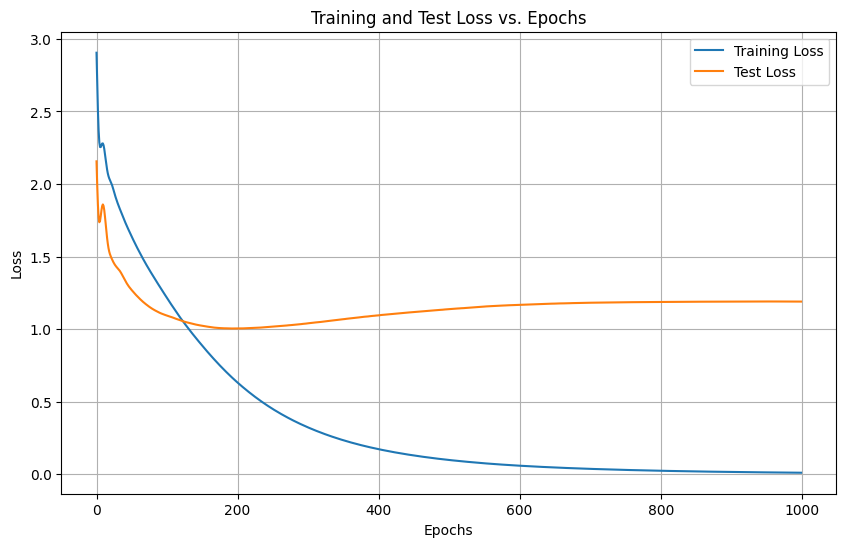

In [25]:
plt.figure(figsize=(10, 6))
plt.plot(train_losses, label='Training Loss')
plt.plot(test_losses, label='Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Test Loss vs. Epochs')
plt.legend()
plt.grid(True)
plt.show()